In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IDK2 import *

# 读取CSV文件
data = pd.read_csv('2d\PenDigits_TEST.csv')

# 提取标签列
labels = data.iloc[:, -1]

# 去除最后一列(label)
data_without_label = data.iloc[:, :-1]

unique_labels = labels.unique()
num_colors = len(unique_labels)
colors = plt.cm.tab10.colors[:num_colors + 1]

print("data shape:", data.shape)
print("label number:", len(unique_labels))

data shape: (3497, 17)
label number: 10


## IDK mapping

In [ ]:
# 对data_without_label每一行提取出来，构建(1, dim)的列表
list_of_distributions = [[np.array(row).tolist()] for row in data_without_label.values]
idk_map = idk_kernel_map(list_of_distributions, 13)

## Visualize before clustering

In [ ]:
# 可视化
plt.figure(figsize=(10, 6))

for i, (_, row) in enumerate(data_without_label.iterrows()):
    if i >= 30: # 可视化前10个时间序列
        break 
    label = labels.iloc[i]
    color_index = list(unique_labels).index(label)
    plt.plot(row, color=colors[color_index])

plt.legend(unique_labels, title='Labels')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Visualization of Time Series Data')
plt.show()

## Reduce dimension

[8 8 9 ... 0 0 4]


e:\Anaconda_software\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
e:\Anaconda_software\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


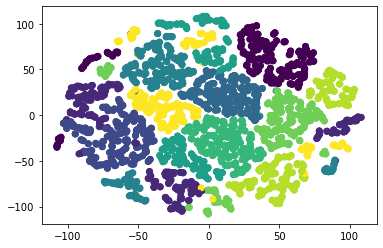

In [2]:
from sklearn.manifold import TSNE
import numpy as np

tsne = TSNE(perplexity=3, n_components=2)

x = np.array(data_without_label)
y = np.array(labels)
# y = [0 if y[i] == 1 else 1 for i in range(len(y))]

print(y)
x_tsne = tsne.fit_transform(x)

plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y)
plt.show()

## IK mapping

In [ ]:
ik = iNN_IK(5, 10) # psi and t
ik.fit(x_tsne)
sparse_representation = ik.fit_transform(x_tsne)
sparse_representation = sparse_representation.toarray()

## Clustering

In [3]:
from MyKMeans import *

print(C)

if C == choose.IDK:
    points = idk_map
if C == choose.IK:
    points = sparse_representation
if C == choose.GDK or C == choose.DTW:
    points = x
else:
    points = x_tsne
centroids, closestCentroid, points = KMeans(points, k=13, maxIters=25)

choose.Cos


## Visualize after clustering

In [ ]:
# 创建一个新的matplotlib图形
fig = plt.figure(figsize=(12, 6))

# 第一个子图：可视化原始点
ax1 = fig.add_subplot(121)
ax1.set_title('Original Points')
ax1.scatter(points[:, 0], points[:, 1], c=y, label='Original Points')

# 第二个子图：可视化聚类后的点
ax2 = fig.add_subplot(122)
ax2.set_title('Points after clustering')
unique_clusters, counts_array = np.unique(closestCentroid, return_counts=True)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_clusters)))
for cluster, color in zip(unique_clusters, colors):
    cluster_points = points[closestCentroid == cluster]
    ax2.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f'Cluster {cluster}')

# 添加图例到第二个子图
ax2.legend()

# 设置坐标轴标签
ax1.set_xlabel('X Axis')
ax1.set_ylabel('Y Axis')
ax2.set_xlabel('X Axis')
ax2.set_ylabel('Y Axis')

# 调整子图间距
plt.tight_layout()

# 显示图形
plt.show()


## NMI & ARI

In [4]:
from sklearn.metrics.cluster import normalized_mutual_info_score
labels_true = y
labels_pred = closestCentroid

score = normalized_mutual_info_score(labels_true, labels_pred)
print(score)

0.47428222913799395


In [5]:
from sklearn import metrics
labels_true = y
labels_pred = closestCentroid

score = metrics.adjusted_rand_score(labels_true, labels_pred)
print(score) 

0.2710234515960331
